# Customer Classification Full Analysis

In [1]:
#import dependencies
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

#### Importing the datasets

**ky** - Kenya

**ng** - Nigeria

In [2]:
missing_value_formats = "-"
ky_customers = pd.read_csv('./datasets/Kenya Customers.csv', na_values = missing_value_formats)
ky_customers.head()

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of employees,Upload restuarant location
0,3144837,WEB,0,2021-03-15T17:13:19.000Z,en,0,0,NaN,NaN
1,3174590,WEB,0,2021-03-20T14:15:11.000Z,en,0,0,NaN,NaN
2,3181998,WEB,0,2021-03-21T15:36:51.000Z,en,0,0,NaN,NaN
3,3191244,WEB,0,2021-03-23T08:54:00.000Z,en,0,367,NaN,NaN
4,3274222,WEB,0,2021-04-06T13:52:39.000Z,en,0,0,NaN,NaN


In [3]:
missing_value_formats = "-"
ky_deliveries = pd.read_csv('./datasets/Kenya Deliveries.csv', na_values = missing_value_formats)

In [4]:
missing_value_formats = "-"
ky_orders = pd.read_csv('./datasets/Kenya Orders.csv', na_values = missing_value_formats)

In [5]:
missing_value_formats = "-"
ng_customers = pd.read_csv('./datasets/Nigeria Customers.csv', na_values = missing_value_formats)

In [6]:
missing_value_formats = "-"
ng_deliveries = pd.read_csv('./datasets/Nigeria Deliveries.csv', na_values = missing_value_formats)

In [7]:
missing_value_formats = "-"
ng_orders = pd.read_csv('./datasets/Nigeria Orders.csv', na_values = missing_value_formats)

### Merging the datasets for Kenya

In [8]:
ky_data = pd.concat([ky_customers, ky_orders], axis=1)

In [9]:
ky_data = pd.concat([ky_data, ky_deliveries], axis=1)

### Merging the datasets for Nigeria

In [10]:
ng_data = pd.concat([ng_customers, ng_orders], axis=1)

In [11]:
ng_data = pd.concat([ng_data, ng_deliveries], axis=1)

### Kenya Data Cleaning

In [12]:
ky_orders.dropna(axis = 1, how ='all', inplace=True)

In [13]:
ky_orders['Description'].fillna('None', inplace=True)

In [14]:
ky_orders['SKU'].fillna('None', inplace=True)

In [15]:
ky_orders['Ratings'].fillna('No rating', inplace=True)

In [16]:
ky_orders['Reviews'].fillna('No review', inplace=True)

In [17]:
ky_orders['Redeemed Loyalty Points'].fillna(0, inplace=True)

In [18]:
ky_orders['Consumed Loyalty Points'].fillna(0, inplace=True)

In [19]:
ky_orders['Cost Price'].fillna(method='pad', inplace=True)
ky_orders['Total Cost Price'].fillna(method='pad', inplace=True)
ky_orders['Category Name'].fillna(method='pad', inplace=True)

In [20]:
ky_orders.isnull().sum()

Order ID                   0
Order Status               0
Category Name              0
SKU                        0
Quantity                   0
Unit Price                 0
Cost Price                 0
Total Cost Price           0
Total Price                0
Order Total                0
Sub Total                  0
Remaining Balance          0
Payment Method             0
Transaction ID             0
Currency Symbol            0
Customer ID                0
Merchant ID                0
Store Name                 0
Pickup Address             0
Description                0
Distance (in km)           0
Order Time                 0
Pickup Time                0
Delivery Time              0
Ratings                    0
Reviews                    0
Order Preparation Time     0
Redeemed Loyalty Points    0
Consumed Loyalty Points    0
Flat Discount              0
dtype: int64

### Nigeria Data Cleaning

In [21]:
ng_orders.dropna(axis = 1, how ='all', inplace=True)

In [22]:
ng_orders['Redeemed Loyalty Points'].fillna(0, inplace=True)
ng_orders['Consumed Loyalty Points'].fillna(0, inplace=True)

In [23]:
ng_orders.isnull().sum()

Order ID                   0
Order Status               0
Category Name              0
SKU                        0
Quantity                   0
Unit Price                 0
Cost Price                 0
Total Cost Price           0
Total Price                0
Order Total                0
Sub Total                  0
Remaining Balance          0
Payment Method             0
Transaction ID             0
Currency Symbol            0
Customer ID                0
Merchant ID                0
Store Name                 0
Distance (in km)           0
Order Time                 0
Pickup Time                0
Delivery Time              0
Order Preparation Time     0
Redeemed Loyalty Points    0
Consumed Loyalty Points    0
Flat Discount              0
dtype: int64

## Customer Segmentation

#### Kenya

In [ ]:
#ky_orders.rename(columns = {'Pickup Address':'Pickup_Address'}, inplace = True)

In [24]:
pd.DataFrame([{'products': len(ky_orders['Category Name'].value_counts()),    
               'transactions': len(ky_orders['Order ID'].value_counts()),
               'customers': len(ky_customers['Customer ID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,10,3451,4177


In [25]:
ky_orders['Order Time']

0        2022-02-17T16:36:27.000Z
1        2022-02-17T16:19:05.000Z
2        2022-02-17T16:19:05.000Z
3        2022-02-17T16:19:05.000Z
4        2022-02-17T16:19:05.000Z
                   ...           
12237    2022-01-01T01:35:58.000Z
12238    2022-01-01T01:35:58.000Z
12239    2022-01-01T00:59:43.000Z
12240    2022-01-01T00:59:43.000Z
12241    2022-01-01T00:59:43.000Z
Name: Order Time, Length: 12242, dtype: object

In [46]:
ky_orders['Order Time'] = pd.to_datetime(ky_orders['Order Time'])
dates = []
for i in ky_orders['Order Time']:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The latest order date in the records:",max(dates))
print("The oldest order date in the records:",min(dates))

The latest order date in the records: 2022-02-17
The oldest order date in the records: 2022-01-01


##### Creating a feature ("Customer_Stats") of the number of days the customers started to shop in the store relative to the last recorded date

In [27]:
#Created a feature "Customer_Stats"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
ky_orders["Customer_Stats"] = days
ky_orders["Customer_Stats"] = pd.to_numeric(ky_orders["Customer_Stats"], errors="coerce")

In [28]:
ky_orders.head(3)

,Order ID,Order Status,Category Name,SKU,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,...,Order Time,Pickup Time,Delivery Time,Ratings,Reviews,Order Preparation Time,Redeemed Loyalty Points,Consumed Loyalty Points,Flat Discount,Customer_Stats
0,11265015,ORDERED,Cooking Fat & Oil,KKCO0487,1,4400,4250.0,4250.0,4400,4350.0,...,2022-02-17 16:36:27+00:00,2022-02-17T16:37:16.000Z,2022-02-18T08:00:00.000Z,No rating,No review,0,50.0,0.0,0,0
1,11264651,ORDERED,Cleaning & Hygiene,KKPT280100,1,180,130.0,130.0,180,7255.0,...,2022-02-17 16:19:05+00:00,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,No rating,No review,0,0.0,0.0,0,0
2,11264651,ORDERED,Flour & Sugar,KKFS0702,6,263,247.0,1482.0,1578,7255.0,...,2022-02-17 16:19:05+00:00,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,No rating,No review,0,0.0,0.0,0,0


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 432x288 with 0 Axes>

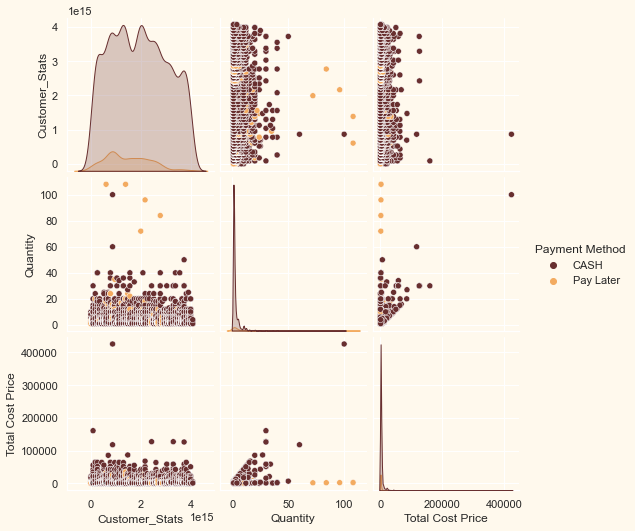

In [29]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Order Status", "Category Name", "Customer_Stats", "Quantity", "Total Cost Price", "Payment Method"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(ky_orders[To_Plot], hue= "Payment Method",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
#plt.show()
plt.savefig('pairplt.jpg')

It can be clearly seen that alot of Kenyan customers prefers paying in cash than pay later

<AxesSubplot:>

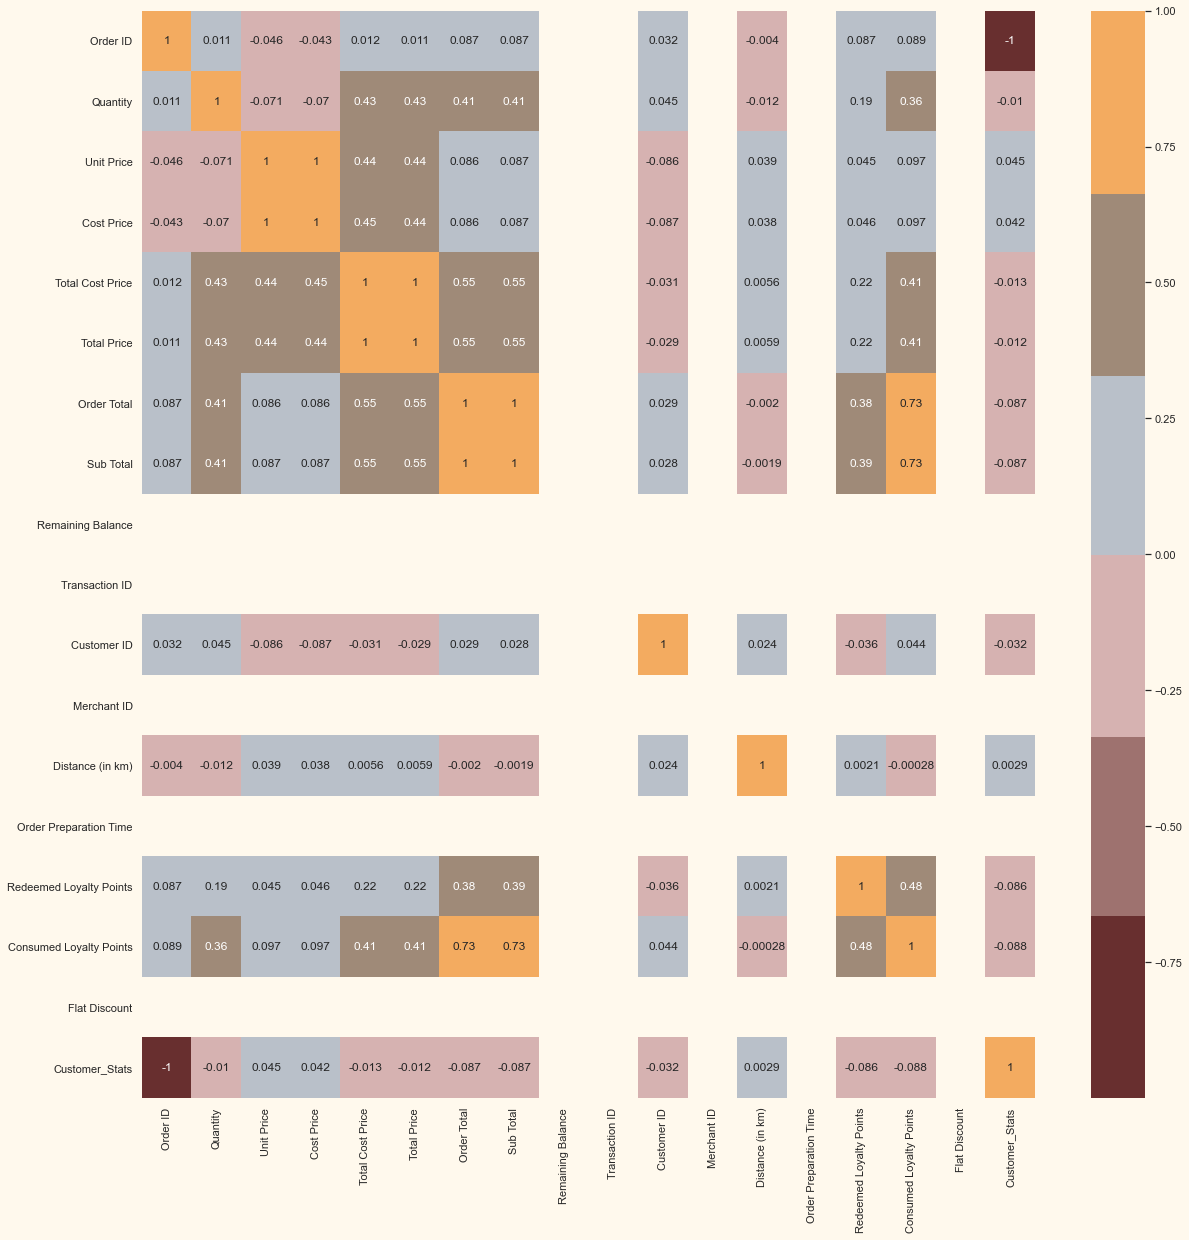

In [30]:
#correlation matrix
corrmat= ky_orders.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

##### Data Preprocessing

In [31]:
ky_orders.drop(["SKU","Currency Symbol","Ratings"], axis=1, inplace=True)

In [32]:
#Get list of categorical variables
s = (ky_orders.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Order Status', 'Category Name', 'Payment Method', 'Store Name', 'Pickup Address', 'Description', 'Pickup Time', 'Delivery Time', 'Reviews']


In [33]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    ky_orders[i]=ky_orders[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [34]:
ky_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12242 entries, 0 to 12241
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Order ID                 12242 non-null  int64              
 1   Order Status             12242 non-null  int32              
 2   Category Name            12242 non-null  int32              
 3   Quantity                 12242 non-null  int64              
 4   Unit Price               12242 non-null  int64              
 5   Cost Price               12242 non-null  float64            
 6   Total Cost Price         12242 non-null  float64            
 7   Total Price              12242 non-null  int64              
 8   Order Total              12242 non-null  float64            
 9   Sub Total                12242 non-null  int64              
 10  Remaining Balance        12242 non-null  int64              
 11  Payment Method           122

In [35]:
#Creating a copy of data
ds = ky_orders.copy()
#Scaling
ds.drop('Order Time', axis=1, inplace=True)
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [36]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Order ID,Order Status,Category Name,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,...,Description,Distance (in km),Pickup Time,Delivery Time,Reviews,Order Preparation Time,Redeemed Loyalty Points,Consumed Loyalty Points,Flat Discount,Customer_Stats
0,1.684332,4.20194,-0.764488,-0.377045,2.184162,2.141467,0.207524,0.211951,-0.419590,-0.419374,...,0.334949,-0.032641,1.764508,1.653001,0.017083,0.0,-0.211734,-0.821118,0.0,-1.710744
1,1.682817,4.20194,-1.196109,-0.377045,-0.776531,-0.795797,-0.354952,-0.353095,-0.236477,-0.240009,...,1.586911,-0.051300,1.763243,1.673618,0.017083,0.0,-0.462161,-0.821118,0.0,-1.710744
2,1.682817,4.20194,-0.332866,0.876222,-0.718300,-0.712385,-0.170372,-0.165907,-0.236477,-0.240009,...,1.586911,-0.051300,1.763243,1.673618,0.017083,0.0,-0.462161,-0.821118,0.0,-1.710744
3,1.682817,4.20194,1.825244,1.878835,-0.857214,-0.847128,-0.293516,-0.290163,-0.236477,-0.240009,...,1.586911,-0.051300,1.763243,1.673618,0.017083,0.0,-0.462161,-0.821118,0.0,-1.710744
4,1.682817,4.20194,-1.627731,-0.377045,-0.728122,-0.739833,-0.344235,-0.343856,-0.236477,-0.240009,...,1.586911,-0.051300,1.763243,1.673618,0.017083,0.0,-0.462161,-0.821118,0.0,-1.710744


##### Dimensionality reduction

In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.


**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Steps in this section:**

* Dimensionality reduction with PCA
* Plotting the reduced dataframe
* Dimensionality reduction with PCA

For this project, I will be reducing the dimensions to 3.

In [37]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,12242.0,4.030032e-15,2.113437,-3.322985,-1.224382,-0.282704,0.716423,71.006617
col2,12242.0,3.130245e-16,1.988679,-4.384364,-1.539024,-0.168612,1.427040,39.757214
col3,12242.0,2.103094e-16,1.540042,-4.613009,-0.922355,0.109909,1.023784,17.749629


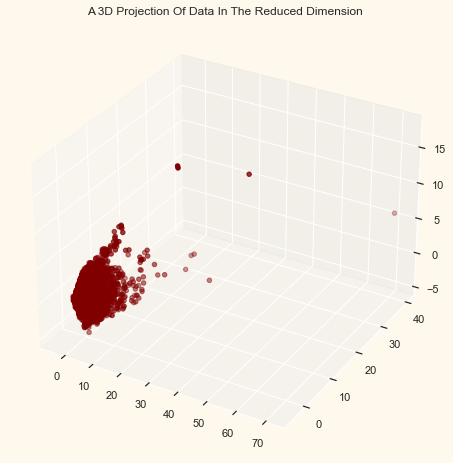

In [38]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.savefig('3Dplot1.jpg')

##### Clustering

Now that I have reduced the attributes to three dimensions, I will be performing clustering via **Agglomerative clustering**. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

Steps involved in the Clustering

* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

In [39]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
ky_orders["Clusters"]= yhat_AC

To examine the clusters formed let's have a look at the 3-D distribution of the clusters.

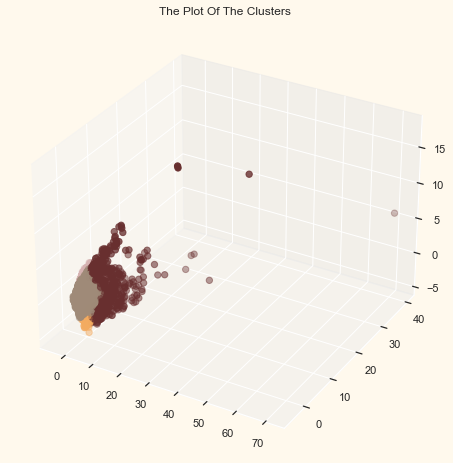

In [40]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.savefig('clusters.jpg')

##### Evaluating Models

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

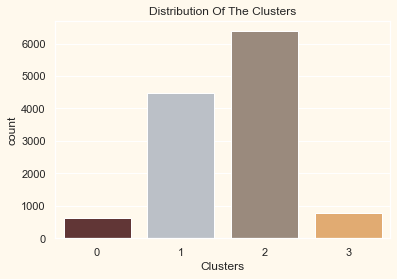

In [41]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=ky_orders["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.savefig('countclusters.jpg')

The clusters seems to be uniformly distributed.

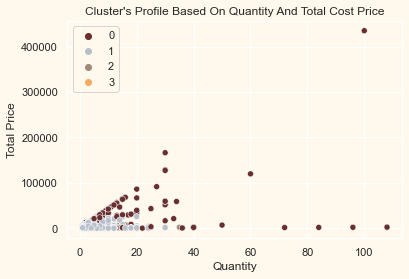

In [42]:
pl = sns.scatterplot(data = ky_orders,x=ky_orders["Quantity"], y=ky_orders["Total Price"],hue=ky_orders["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Quantity And Total Cost Price")
plt.legend()
plt.savefig('scatterplt.jpg')

Total Cost Price vs Quantity plot shows the clusters pattern

* group 0: high price buyers & high quantity
* group 1: low price buyers & average quantity
* group 2: low price buyers & average quantity
* group 3: low price buyers & low quantity

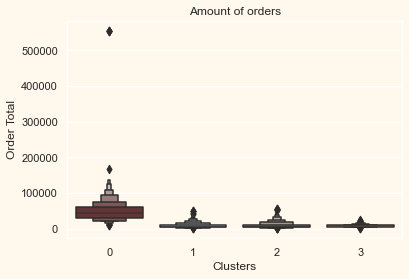

In [43]:
#Plotting the Order Total
plt.figure()
pl=sns.boxenplot(y=ky_orders["Order Total"],x=ky_orders["Clusters"], palette= pal)
pl.set_title("Amount of orders")
plt.savefig('amntOrders.jpg')

##### From the above plot, it can be clearly seen that cluster 0 is our biggest set of customers followed by cluster 2.

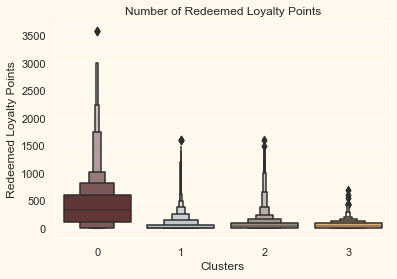

In [44]:
#Plotting the number of Redeemed Loyalty Points
plt.figure()
pl=sns.boxenplot(y=ky_orders["Redeemed Loyalty Points"],x=ky_orders["Clusters"], palette= pal)
pl.set_title("Number of Redeemed Loyalty Points")
plt.savefig('loyaltyp.jpg')

The loyalty points seems to be working well in getting customers to engage. It has best outcome with cluster 0, cluster 1 and cluster 2. However, nothing seems to attract cluster 3 overwhelmingly.

##### Profiling

Now that we have formed the clusters and looked at their purchasing habits. Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. On the basis of the outcomes, I will be arriving at the conclusions.

<Figure size 432x288 with 0 Axes>

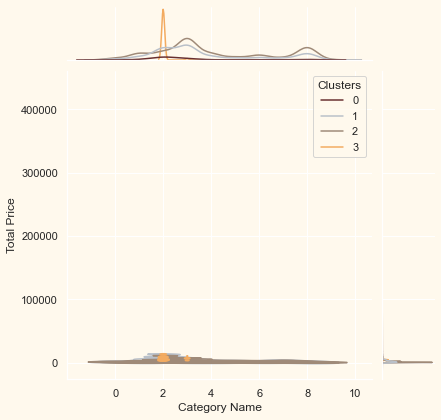

<Figure size 432x288 with 0 Axes>

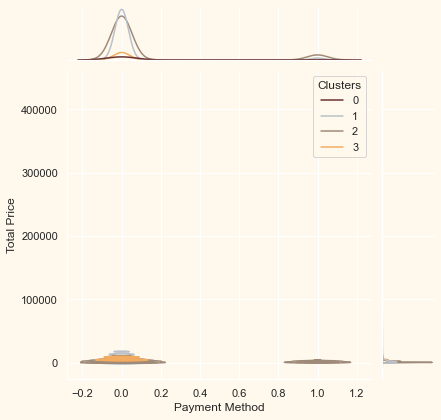

<Figure size 432x288 with 0 Axes>

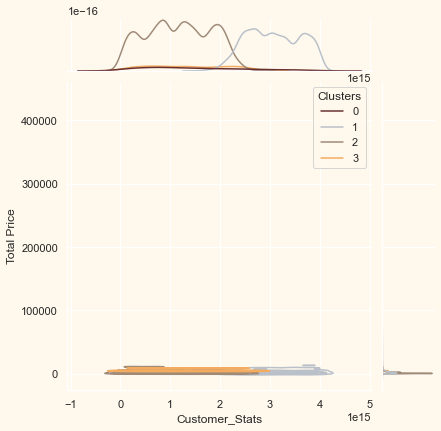

<Figure size 432x288 with 0 Axes>

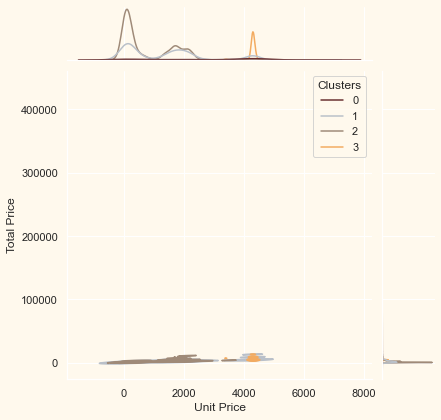

<Figure size 432x288 with 0 Axes>

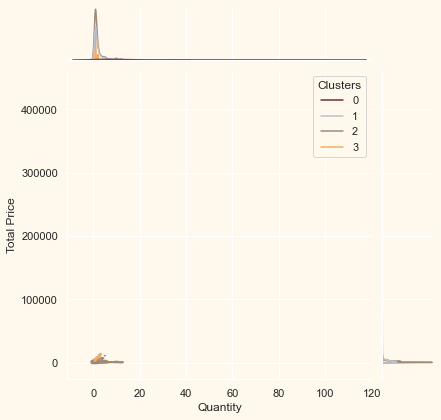

In [45]:
Personal = [ "Category Name","Payment Method","Customer_Stats","Unit Price","Quantity"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=ky_orders[i], y=ky_orders["Total Price"], hue =ky_orders["Clusters"], kind="kde", palette=pal)
    plt.savefig('fullplot.jpg')

**Group 0**
* High income group
* Bulk quantity buyers
* High price buyers

**Group 1**
* Average income group
* Average quantity buyers
* Average price buyers

**Group 2**
* Low income group
* Average quantity buyers
* Low price buyers

**Group 3**
* Low income group
* Low quantity buyers
* Low price buyers


Group 0 is the company’s star buyers while more attention should be paid to group 3 by the marketing team.

##### Conclusion

In this notebook, I performed unsupervised clustering. I used dimensionality reduction followed by agglomerative clustering. I came up with 4 clusters and further used them in profiling customers in clusters according to their purchase habit and stats. This can be used in planning better marketing strategies.